# 데이터분석과 R 
### Term Project
<pre>
산업정보시스템공학과 201510336
구경민
</pre>

## 목차
<pre style = "font-weight: bold">
1. Solar flare datasets
2. Pre-processing & EDA  
3. Modeling
4. Conclusion
</pre>

# 1. Solar flare datasets
<pre>
1.1 solar flare
 solar flare는 태양 흑점 근처에서 방출되는 복사 강도의 단기간동안 갑작스런 증가현상이다. solar flare는 수년 동안 H- 알파 파장에서 가장 잘 모니터링되었으며, 가끔 광구에서 백색광 플레어가 보이지만 색층에서 발생한다. 현대에서는 solar flare에 대해 위성을 통해 태양 X- 선 파장을 모니터링한다. flare는 몇 분 정도의 상승 시간과 수십 분 정도의 감쇠 시간이 특징이다. 일반적인 플레어에서 소비되는 총 에너지는 약 1030 에르그이며, 자기장은 100 ~ 10,000 가우스의 값에 도달하는 매우 높은 수준이다. H- 알파의 광학 플레어는 일반적으로 무선 및 X- 선 폭발을 동반하며 때로는 고 에너지 입자 방출을 동반한다.
 flare의 광학 밝기와 크기는 "중요도"라는 두 문자 코드로 표시된다. 첫 번째 문자 인 1에서 4까지의 숫자는 명백한 영역을 나타낸다. 1보다 작은 영역의 경우 "S"가 하위 플레어를 지정하는 데 사용된다. 두 번째 문자는 상대적 밝기를 나타낸다. B는 밝음, N은 보통, F는 희미 함을 나타낸다. 이번 텀 프로젝트를 통해 solar flare로 인해 지구에 피해를 입었는지와 태양의 활동에 따른 흑점의 크기를 구분하는 모델을 만들어 태양의 활동을 파악해보려고 한다. 

1.2 Dataset 설명
flare 데이터는 2개의 데이터로 나뉘어져 있고(flare1, flare2) 여기서는 데이터변수를 flare1을 1969년 데이터라는 뜻으로 falre69, flare2 1978년 데이터라는 뜻으로 flare78이라고 명명한다. 이중 1978년도 데이터(flare78)는 오류수정이 된 데이터라 신뢰성이 있다. 그리고 각 instance는 태양의 1번 활동 영역 1개에 대한 feature다.

1.3 Attribute 설명
Class: Code for class (modified Zurich class), A,B,C,D,E,F,H로 구성
LSP: Code for largest spot size, X,R,S,A,H,K로 구성
SD: Code for spot distribution, X,O,I,C로 구성
Activity: 1 = reduced, 2 = unchanged
Evoluation: 1 = decay, 2 = no growth, 3 = growth
Activity24: Previous 24 hour flare activity code (1 = nothing as big as an M1, 2 = one M1, 3 = more activity than one M1)
HC: Historically-complex (1 = Yes, 2 = No)
RHC: Did region become historically complex  (1 = yes, 2 = no) on this pass across the sun's disk
Area: 1 = small, 2 = large
ALS: Area of the largest spot (1 = <=5, 2 = >5)
아래는 추가변수들이다.
C_class: C-class flares production by this region in the following 24 hours (common flares); Number
M_class: M-class flares production by this region in the following 24 hours (moderate flares); Number
X_class: X-class flares production by this region in the following 24 hours (severe flares); Number

</pre>

In [1]:
library(dplyr)
library(caret)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


<pre>
 dplyr은 전처리를 위한 도구, caret은 나이브베이지안 등 여러 분석 툴, ggplot2는 시각화를 위해 로드하였다.
</pre>

In [2]:
library(readr)
flare69 <- read_table2("C:/Users/user/Desktop/비대면/데분알/MiddleTest/DataAnalysis_with_R/Term Project/flare.data1",
                      col_names = FALSE)
flare78 <- read_table2("C:/Users/user/Desktop/비대면/데분알/MiddleTest/DataAnalysis_with_R/Term Project/flare.data2",
                      col_names = FALSE)

Warning message:
"package 'readr' was built under R version 3.6.3"

-- Column specification --------------------------------------------------------
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double()
)




# 2. Pre-processing & EDA
2.1 Pre-processing

<pre>
 먼저 데이터 컬럼에 이름을 부여하고, head()를 이용해서 데이터 상위 6개를 확인한다. 
</pre>

In [3]:
names(flare69) <- c('Class','LSP','SD','Activity',
                    'Evoluation','Activity24','HC',
                    'RHC','Area','ALS', 'C_class', 'M_class', 'X_class')
names(flare78) <- c('Class','LSP','SD','Activity',
                    'Evoluation','Activity24','HC',
                    'RHC','Area','ALS','C_class', 'M_class', 'X_class')
head(flare69)
head(flare78)

Class,LSP,SD,Activity,Evoluation,Activity24,HC,RHC,Area,ALS,C_class,M_class,X_class
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C,S,O,1,2,1,1,2,1,2,0,0,0
D,S,O,1,3,1,1,2,1,2,0,0,0
C,S,O,1,3,1,1,2,1,1,0,0,0
D,S,O,1,3,1,1,2,1,2,0,0,0
D,A,O,1,3,1,1,2,1,2,0,0,0
D,A,O,1,2,1,1,2,1,2,0,0,0


Class,LSP,SD,Activity,Evoluation,Activity24,HC,RHC,Area,ALS,C_class,M_class,X_class
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H,A,X,1,3,1,1,1,1,1,0,0,0
D,R,O,1,3,1,1,2,1,1,0,0,0
C,S,O,1,3,1,1,2,1,1,0,0,0
H,R,X,1,2,1,1,1,1,1,0,0,0
H,S,X,1,1,1,1,2,1,1,0,0,0
C,A,O,1,2,1,1,2,1,1,0,0,0


<pre>
 str()을 이용해서 두 데이터의 구조를 확인한다.
</pre>

In [23]:
print("flare69 summary")
summary(flare69)
print("flare69 str")
str(flare69)
print("flare78 summary")
summary(flare78)
print("flare78 str")
str(flare78)

[1] "flare69 summary"


 Class  LSP     SD         Activity       Evoluation      Activity24   
 B:65   A: 61   C: 19   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 C:76   H: 11   I: 89   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000  
 D:88   K: 48   O:150   Median :1.000   Median :3.000   Median :1.000  
 E:21   R: 38   X: 65   Mean   :1.139   Mean   :2.486   Mean   :1.192  
 F: 8   S:100           3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.:1.000  
 H:65   X: 65           Max.   :2.000   Max.   :3.000   Max.   :3.000  
       HC             RHC             Area            ALS       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :1.000   Median :2.000  
 Mean   :1.368   Mean   :1.947   Mean   :1.028   Mean   :1.755  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
    C_class          M_class          X_c

[1] "flare69 str"
Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	323 obs. of  13 variables:
 $ Class     : Factor w/ 6 levels "B","C","D","E",..: 2 3 2 3 3 3 3 3 3 2 ...
 $ LSP       : Factor w/ 6 levels "A","H","K","R",..: 5 5 5 5 1 1 1 1 3 4 ...
 $ SD        : Factor w/ 4 levels "C","I","O","X": 3 3 3 3 3 3 3 3 3 3 ...
 $ Activity  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Evoluation: num  2 3 3 3 3 2 2 2 3 3 ...
 $ Activity24: num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ RHC       : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Area      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ALS       : num  2 2 1 2 2 2 1 2 2 1 ...
 $ C_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ M_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_character(),
  ..   X2 = col_character(),
  ..   X3 = col_character(),
  ..   X4 = col_double(),
  ..   X5 = col_double(),
  ..   X6 = col_double(),
  ..   X7 = col_double(),
  .. 

 Class   LSP     SD         Activity       Evoluation      Activity24   
 B:147   A:216   C: 35   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 C:211   H: 27   I:223   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000  
 D:239   K: 46   O:477   Median :1.000   Median :2.000   Median :1.000  
 E: 95   R:218   X:331   Mean   :1.154   Mean   :2.402   Mean   :1.059  
 F: 43   S:414           3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.:1.000  
 H:331   X:145           Max.   :2.000   Max.   :3.000   Max.   :3.000  
       HC             RHC             Area            ALS       C_class      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1   1st Qu.:0.0000  
 Median :1.000   Median :2.000   Median :1.000   Median :1   Median :0.0000  
 Mean   :1.404   Mean   :1.875   Mean   :1.025   Mean   :1   Mean   :0.3002  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:1   3rd Qu.:0.0000  
 Max.   :2.000   Max.

[1] "flare78 str"
Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	1066 obs. of  13 variables:
 $ Class     : Factor w/ 6 levels "B","C","D","E",..: 6 3 2 6 6 2 1 2 2 1 ...
 $ LSP       : Factor w/ 6 levels "A","H","K","R",..: 1 4 5 4 5 1 6 1 1 6 ...
 $ SD        : Factor w/ 4 levels "C","I","O","X": 4 3 3 4 4 3 3 3 3 3 ...
 $ Activity  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Evoluation: num  3 3 3 2 1 2 3 3 2 3 ...
 $ Activity24: num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ RHC       : num  1 2 2 1 2 2 2 2 2 2 ...
 $ Area      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ALS       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ C_class   : num  0 0 0 0 0 0 0 0 1 0 ...
 $ M_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_character(),
  ..   X2 = col_character(),
  ..   X3 = col_character(),
  ..   X4 = col_double(),
  ..   X5 = col_double(),
  ..   X6 = col_double(),
  ..   X7 = col_double(),
  ..

<pre>
 요인변수(factor)형이여야 하는 변수 class, LSP, SD가 char형이기에 as.factor를 이용해서 factor형으로 바꿔주고 다시 구조를 파악한다.
</pre>

In [5]:
flare69$Class <- as.factor(flare69$Class)
flare69$LSP <- as.factor(flare69$LSP)
flare69$SD <- as.factor(flare69$SD)
flare78$Class <- as.factor(flare78$Class)
flare78$LSP <- as.factor(flare78$LSP)
flare78$SD <- as.factor(flare78$SD)

str(flare69)
str(flare78)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	323 obs. of  13 variables:
 $ Class     : Factor w/ 6 levels "B","C","D","E",..: 2 3 2 3 3 3 3 3 3 2 ...
 $ LSP       : Factor w/ 6 levels "A","H","K","R",..: 5 5 5 5 1 1 1 1 3 4 ...
 $ SD        : Factor w/ 4 levels "C","I","O","X": 3 3 3 3 3 3 3 3 3 3 ...
 $ Activity  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Evoluation: num  2 3 3 3 3 2 2 2 3 3 ...
 $ Activity24: num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ RHC       : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Area      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ALS       : num  2 2 1 2 2 2 1 2 2 1 ...
 $ C_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ M_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_character(),
  ..   X2 = col_character(),
  ..   X3 = col_character(),
  ..   X4 = col_double(),
  ..   X5 = col_double(),
  ..   X6 = col_double(),
  ..   X7 = col_double(),
  ..   X8 = col_double(

<pre>
  데이터 구조를 확인하였으니 각 변수의 결측치와 이상치를 확인한다.
</pre>

In [6]:
# 결측치 빈도확인
table(is.na(flare69))
table(is.na(flare78))


FALSE 
 4199 


FALSE 
13858 

<pre>
2.2 EDA
 2.1에서 전처리에서 데이터의 특징과 결측치의 유무를 확인하고 factor형으로 변환할 변수는 변환하였다. 다음은 상자그림을 통해 이상치를 파악하고, 모자이크 그림을 통해 빈도의 비례가 어떻게 되는지 파악한 다음에 상관분석을 통해 데이터간의 상관관계를 파악한다.
</pre>

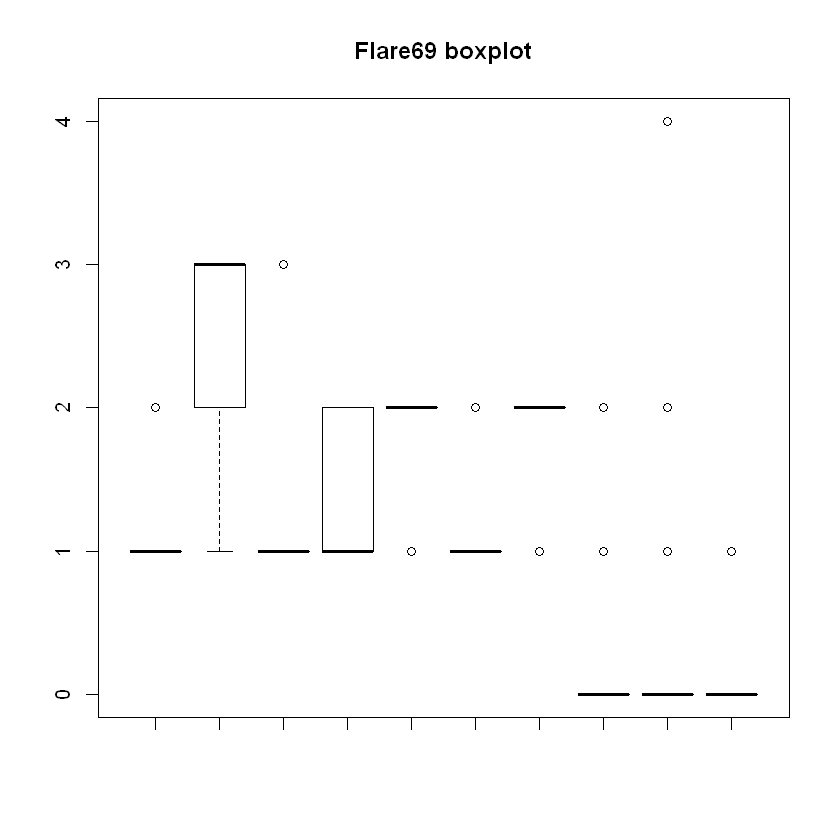

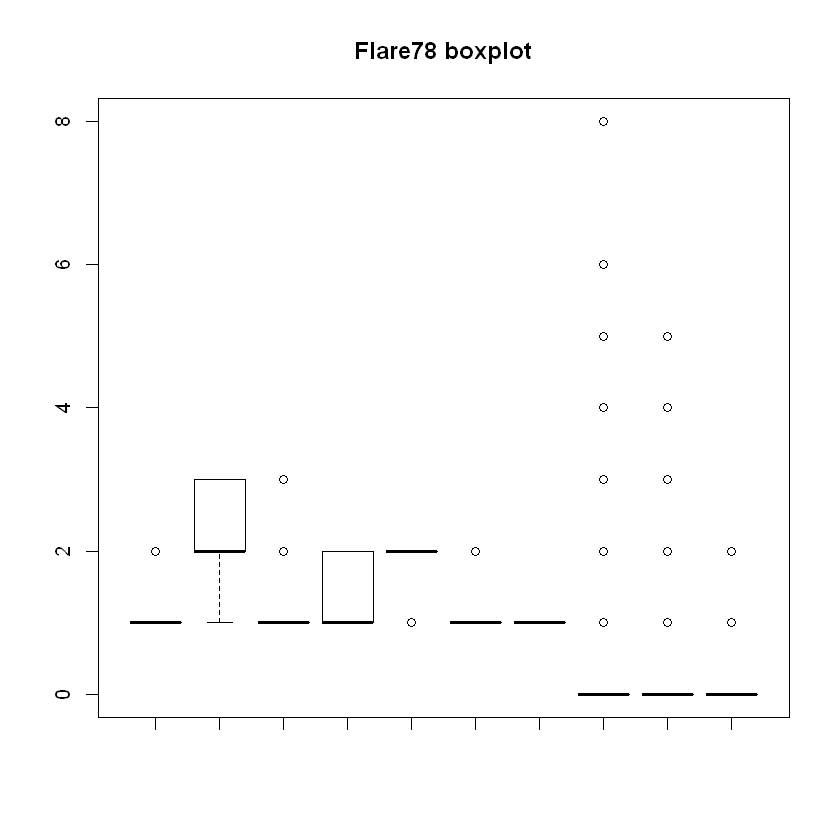

In [7]:
# 이상치 확인을 위한 boxplot 
boxplot(flare69$Activity, flare69$Evoluation, flare69$Activity24, 
        flare69$HC, flare69$RHC, flare69$Area, flare69$ALS, flare69$C_class, 
        flare69$M_class, flare69$X_class,
       main='Flare69 boxplot')
boxplot(flare78$Activity, flare78$Evoluation, flare78$Activity24, 
        flare78$HC, flare78$RHC, flare78$Area, flare78$ALS, flare78$C_class, 
        flare78$M_class, flare78$X_class,
       main='Flare78 boxplot')

In [24]:
## 모자이크 그림 추가하기
library(ggmosaic)


Warning message:
"package 'ggmosaic' was built under R version 3.6.3"


<pre>
 변수간의 상관관계를 알기 위한 상관분석에 앞서 flare69_1, flare78_1 변수에 각각 flare69와 flare78로 데이터를 복사해주고, factor인 변수를 numeric으로 변환한다. class의 A,B,C,D,E,F,H는 0,1,2,3,4,5,6으로 LSP의 X,R,S,A,H,K는 0,1,2,3,4,5로, SD의 X,O,I,C는 0,1,2,3으로 변환하여 상관분석을 행한다.
</pre>

In [17]:
# correlation_preprocessing
flare69_1 <- flare69
flare69_1 <- within(flare69_1, {
            Class = ifelse(flare69_1$Class == 'A', 0, 
                          ifelse(flare69_1$Class == 'B', 1,
                                ifelse(flare69_1$Class == 'C', 2,
                                      ifelse(flare69_1$Class == 'D', 3,
                                            ifelse(flare69_1$Class == 'E', 4,
                                                  ifelse(flare69_1$Class == 'F',5, 6
                                                        ))))))
            LSP = ifelse(flare69_1$LSP == 'X', 0,
                         ifelse(flare69_1$LSP == 'R',1,
                               ifelse(flare69_1$LSP == 'S', 2,
                                     ifelse(flare69_1$LSP == 'A', 3,
                                           ifelse(flare69_1$LSP=='H',4, 5)))))
            SD = ifelse(flare69_1$LSP == 'X', 0,
                        ifelse(flare69_1$LSP == 'O', 1,
                              ifelse(flare69_1$LSP == 'I', 2, 3)))
})
head(flare69_1)
str(flare69_1)

flare78_1 <- flare78
flare78_1 <- within(flare78_1, {
            Class = ifelse(flare78_1$Class == 'A', 0, 
                          ifelse(flare78_1$Class == 'B', 1,
                                ifelse(flare78_1$Class == 'C', 2,
                                      ifelse(flare78_1$Class == 'D', 3,
                                            ifelse(flare78_1$Class == 'E', 4,
                                                  ifelse(flare78_1$Class == 'F',5, 6
                                                        ))))))
            LSP = ifelse(flare78_1$LSP == 'X', 0,
                         ifelse(flare78_1$LSP == 'R',1,
                               ifelse(flare78_1$LSP == 'S', 2,
                                     ifelse(flare78_1$LSP == 'A', 3,
                                           ifelse(flare78_1$LSP=='H',4, 5)))))
            SD = ifelse(flare78_1$LSP == 'X', 0,
                        ifelse(flare78_1$LSP == 'O', 1,
                              ifelse(flare78_1$LSP == 'I', 2, 3)))
})
head(flare78_1)
str(flare78_1)

Class,LSP,SD,Activity,Evoluation,Activity24,HC,RHC,Area,ALS,C_class,M_class,X_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,3,1,2,1,1,2,1,2,0,0,0
3,2,3,1,3,1,1,2,1,2,0,0,0
2,2,3,1,3,1,1,2,1,1,0,0,0
3,2,3,1,3,1,1,2,1,2,0,0,0
3,3,3,1,3,1,1,2,1,2,0,0,0
3,3,3,1,2,1,1,2,1,2,0,0,0


Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	323 obs. of  13 variables:
 $ Class     : num  2 3 2 3 3 3 3 3 3 2 ...
 $ LSP       : num  2 2 2 2 3 3 3 3 5 1 ...
 $ SD        : num  3 3 3 3 3 3 3 3 3 3 ...
 $ Activity  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Evoluation: num  2 3 3 3 3 2 2 2 3 3 ...
 $ Activity24: num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ RHC       : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Area      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ALS       : num  2 2 1 2 2 2 1 2 2 1 ...
 $ C_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ M_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_character(),
  ..   X2 = col_character(),
  ..   X3 = col_character(),
  ..   X4 = col_double(),
  ..   X5 = col_double(),
  ..   X6 = col_double(),
  ..   X7 = col_double(),
  ..   X8 = col_double(),
  ..   X9 = col_double(),
  ..   X10 = col_double(),
  ..   X11 = col_double(),
  ..   X12 = col

Class,LSP,SD,Activity,Evoluation,Activity24,HC,RHC,Area,ALS,C_class,M_class,X_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,3,3,1,3,1,1,1,1,1,0,0,0
3,1,3,1,3,1,1,2,1,1,0,0,0
2,2,3,1,3,1,1,2,1,1,0,0,0
6,1,3,1,2,1,1,1,1,1,0,0,0
6,2,3,1,1,1,1,2,1,1,0,0,0
2,3,3,1,2,1,1,2,1,1,0,0,0


Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	1066 obs. of  13 variables:
 $ Class     : num  6 3 2 6 6 2 1 2 2 1 ...
 $ LSP       : num  3 1 2 1 2 3 0 3 3 0 ...
 $ SD        : num  3 3 3 3 3 3 0 3 3 0 ...
 $ Activity  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Evoluation: num  3 3 3 2 1 2 3 3 2 3 ...
 $ Activity24: num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ RHC       : num  1 2 2 1 2 2 2 2 2 2 ...
 $ Area      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ALS       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ C_class   : num  0 0 0 0 0 0 0 0 1 0 ...
 $ M_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X_class   : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_character(),
  ..   X2 = col_character(),
  ..   X3 = col_character(),
  ..   X4 = col_double(),
  ..   X5 = col_double(),
  ..   X6 = col_double(),
  ..   X7 = col_double(),
  ..   X8 = col_double(),
  ..   X9 = col_double(),
  ..   X10 = col_double(),
  ..   X11 = col_double(),
  ..   X12 = co

Warning message in cor(flare78_1):
"표준편차가 0입니다"


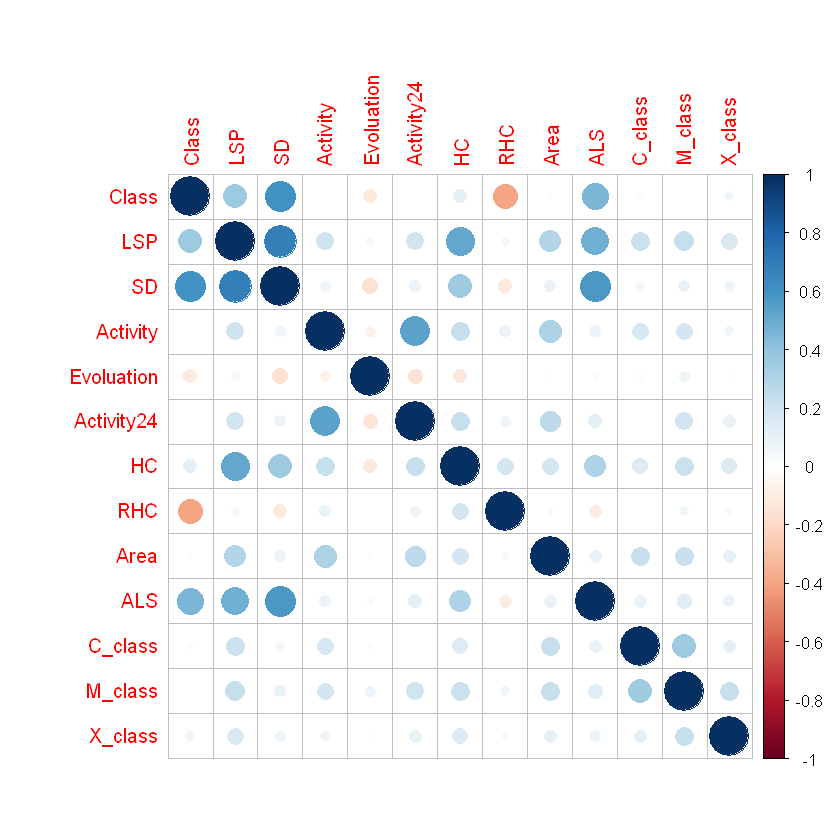

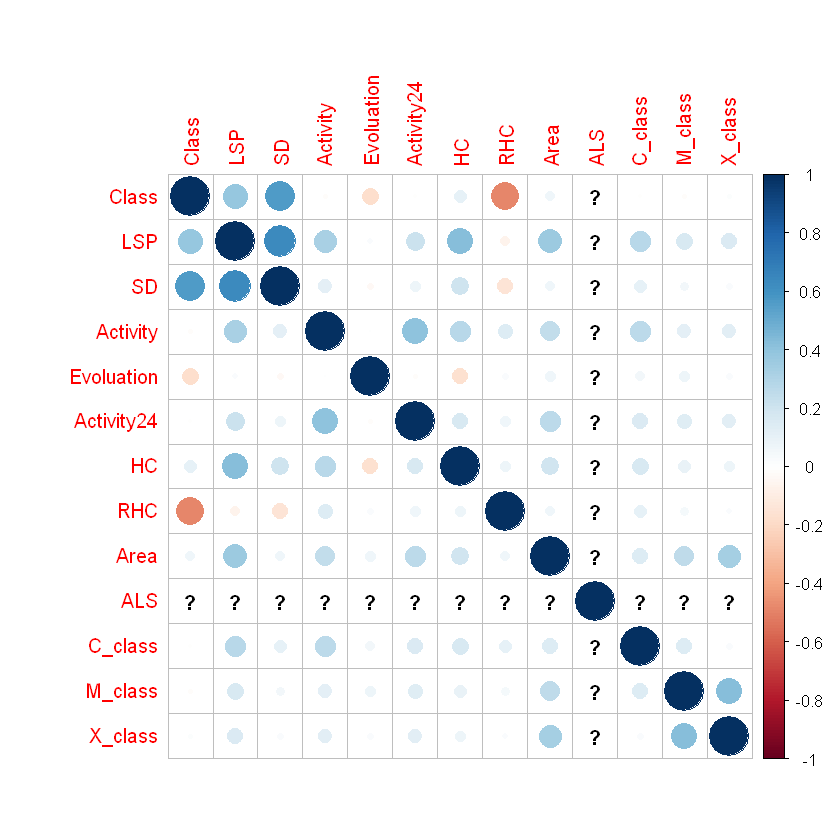

In [20]:
# correlation
library(corrplot)
flare69_cor <- cor(flare69_1)
flare78_cor <- cor(flare78_1)

corrplot(flare69_cor)
corrplot(flare78_cor)

# 3. Modeling

<pre>
출처
solar fire datasets
<a href = https://data.noaa.gov//metaview/page?xml=NOAA/NESDIS/NGDC/STP/Solar/iso/xml/solar-features_solar-flares.xml&view=getDataView&header=none>NOAA Solar features - Solar flares</a>
<a href = https://ko.wikipedia.org/wiki/%EC%8D%AC%ED%94%8C%EB%A0%88%EC%96%B4>위키백과 썬플레어</a>
<a href = http://archive.ics.uci.edu/ml/datasets/solar+flare>UCI Solar Flare data Set </a>

</pre>